In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

In [2]:
df_train = pd.read_csv('./input/df_train_dummy.csv')
df_test = pd.read_csv('./input/df_test_dummy.csv')

In [3]:
y_train = pd.DataFrame(df_train['SalePrice_log'])
x_train = df_train.drop('SalePrice_log', axis=1)
x_test = df_test.drop('SalePrice_log', axis=1)

In [4]:
print("y_train.shape:", y_train.shape)
y_train.head()

y_train.shape: (1458, 1)


,SalePrice_log
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


In [5]:
print("x_train.shape:", x_train.shape)
x_train.head()

x_train.shape: (1458, 323)


,1stFlrSF_log,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea_log,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,6.753438,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,7.444833,1,1,8450,65.0,0,196.0,0,61,5,7,0,0,8,856.0,0,2003,2003,2008,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,7.141245,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,7.141245,0,1,9600,80.0,0,0.0,0,0,8,6,0,0,6,1262.0,298,1976,1976,2007,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
2,6.825460,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,7.488294,1,1,11250,68.0,0,162.0,0,42,5,7,0,0,6,920.0,0,2001,2002,2008,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,6.869014,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,7.448916,0,1,9550,60.0,0,0.0,0,35,5,7,0,0,7,756.0,0,1915,1970,2006,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,7.044033,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,7.695758,1,1,14260,84.0,0,350.0,0,84,5,8,0,0,9,1145.0,192,2000,2000,2008,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


In [6]:
print("x_test.shape:", x_test.shape)
x_test.head()

x_test.shape: (1459, 323)


,1stFlrSF_log,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea_log,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,6.799056,0,0,2,468.0,144.0,0.0,0.0,270.0,0,0,1,730.0,1.0,1961.0,6.799056,0,1,11622,80.0,0,0.0,0,0,6,5,0,120,5,882.0,140,1961,1961,2010,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,7.192934,0,0,3,923.0,0.0,0.0,0.0,406.0,0,0,1,312.0,1.0,1958.0,7.192934,1,1,14267,81.0,0,108.0,12500,36,6,6,0,0,6,1329.0,393,1958,1958,2010,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
2,6.834109,701,0,3,791.0,0.0,0.0,0.0,137.0,0,1,2,482.0,2.0,1997.0,7.396335,1,1,13830,74.0,0,0.0,0,34,5,5,0,0,6,928.0,212,1997,1998,2010,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,6.831954,678,0,3,602.0,0.0,0.0,0.0,324.0,0,1,2,470.0,2.0,1998.0,7.380879,1,1,9978,78.0,0,20.0,0,36,6,6,0,0,7,926.0,360,1998,1998,2010,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,7.155396,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,0,2,506.0,2.0,1992.0,7.155396,0,1,5005,43.0,0,0.0,0,82,5,8,0,144,5,1280.0,0,1992,1992,2010,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


## Normalization

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train_scaled.head()

,1stFlrSF_log,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea_log,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.806494,1.167626,-0.11642,0.163894,0.617283,-0.288867,1.113886,-0.241236,-0.943795,-0.359603,-0.952231,0.793546,0.357973,0.313159,1.019569,0.539563,1.229699,-0.211605,-0.203934,-0.221328,-0.120325,0.523937,-0.087748,0.225982,-0.517649,0.658506,-0.063709,-0.270407,0.921812,-0.473766,-0.750831,1.052959,0.880362,0.138375,-0.188445,0.25801,-0.170101,0.443897,-0.14739,-0.192313,-0.174324,-0.291241,-0.178458,-0.216014,-0.161363,-0.037062,0.337383,-0.422680,-0.315512,-0.291241,...,-0.236129,-0.289853,-0.132083,-0.231232,-0.205361,-0.250364,-0.132083,-0.163587,-0.087189,-0.256495,-0.144943,0.299476,-0.037062,-0.037062,-0.037062,0.064282,0.132083,-0.026198,-0.026198,-0.026198,-0.087189,-0.058661,-0.064282,-0.09485,0.527092,-0.087189,-0.491841,-0.069457,-0.037062,-0.272817,-0.05245,-0.091098,-0.117933,0.465863,-0.303537,-0.174324,-0.05245,-0.037062,-0.078811,-0.058661,-0.058661,-0.299476,0.0,-0.045408,0.388265,-0.064282,0.064282,0.026198,-0.026198,0.0
1,0.428226,-0.794354,-0.11642,0.163894,1.245719,-0.288867,-0.819502,3.945931,-0.640584,-0.359603,0.605965,0.793546,-0.056795,0.313159,-0.106307,-0.380320,-0.760202,-0.211605,-0.087252,0.491760,-0.120325,-0.570739,-0.087748,-0.708304,2.177825,-0.068293,-0.063709,-0.270407,-0.316329,0.504925,1.627328,0.158428,-0.428115,-0.614427,-0.188445,0.25801,-0.170101,0.443897,-0.14739,-0.192313,-0.174324,-0.291241,-0.178458,-0.216014,-0.161363,-0.037062,0.337383,-0.422680,3.169457,-0.291241,...,-0.236129,-0.289853,-0.132083,-0.231232,-0.205361,-0.250364,-0.132083,-0.163587,11.469327,-0.256495,-0.144943,0.299476,-0.037062,-0.037062,-0.037062,0.064282,0.132083,-0.026198,-0.026198,-0.026198,-0.087189,-0.058661,-0.064282,-0.09485,0.527092,-0.087189,-0.491841,-0.069457,-0.037062,-0.272817,-0.05245,-0.091098,-0.117933,0.465863,-0.303537,-0.174324,-0.05245,-0.037062,-0.078811,-0.058661,-0.058661,-0.299476,0.0,-0.045408,0.388265,-0.064282,0.064282,0.026198,-0.026198,0.0
2,-0.577186,1.195195,-0.11642,0.163894,0.108989,-0.288867,1.113886,-0.241236,-0.301168,-0.359603,0.605965,0.793546,0.640770,0.313159,0.936171,0.671249,1.229699,-0.211605,0.080162,-0.078710,-0.120325,0.334044,-0.087748,-0.065025,-0.517649,0.658506,-0.063709,-0.270407,-0.316329,-0.319490,-0.750831,0.986698,0.831900,0.138375,-0.188445,0.25801,-0.170101,0.443897,-0.14739,-0.192313,-0.174324,-0.291241,-0.178458,-0.216014,-0.161363,-0.037062,0.337383,-0.422680,-0.315512,3.433580,...,-0.236129,-0.289853,-0.132083,-0.231232,-0.205361,-0.250364,-0.132083,-0.163587,-0.087189,-0.256495,-0.144943,0.299476,-0.037062,-0.037062,-0.037062,0.064282,0.132083,-0.026

## Modelling (Keras)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import regularizers
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [9]:
def Create_model (L2 = 0.01):
    
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=x_train.shape[1], activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(L2)))
    model.add(Dense(30, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(L2)))
    model.add(Dense(40, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(L2)))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics = ['mae'])
    return model

In [10]:
model = Create_model()
model.summary()

W0827 22:24:50.811639 16760 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 22:24:50.826630 16760 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 22:24:50.829591 16760 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 22:24:50.886436 16760 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                3240      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 4,851
Trainable params: 4,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x = x_train_scaled, y = y_train, epochs = 250, batch_size = 32,
                    validation_split = 0.2)

W0827 22:26:28.533406 16760 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0827 22:26:28.633614 16760 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1166 samples, validate on 292 samples
Epoch 1/250
1166/1166 [==============================] - 0s 244us/step - loss: 128.5826 - mean_absolute_error: 11.2823 - val_loss: 100.8964 - val_mean_absolute_error: 9.9788
Epoch 2/250
1166/1166 [==============================] - 0s 47us/step - loss: 54.4977 - mean_absolute_error: 6.7804 - val_loss: 15.6814 - val_mean_absolute_error: 3.1025
Epoch 3/250
1166/1166 [==============================] - 0s 38us/step - loss: 9.5340 - mean_absolute_error: 2.2889 - val_loss: 9.4021 - val_mean_absolute_error: 2.1880
Epoch 4/250
1166/1166 [==============================] - 0s 38us/step - loss: 5.1985 - mean_absolute_error: 1.6056 - val_loss: 7.7114 - val_mean_absolute_error: 1.8878
Epoch 5/250
1166/1166 [==============================] - 0s 39us/step - loss: 3.7739 - mean_absolute_error: 1.3155 - val_loss: 7.1807 - val_mean_absolute_error: 1.7687
Epoch 6/250
1166/1166 [==============================] - 0s 38us/step - loss: 2.9820 - mean_absolute_erro

Epoch 49/250
1166/1166 [==============================] - 0s 36us/step - loss: 0.5467 - mean_absolute_error: 0.2340 - val_loss: 3.5290 - val_mean_absolute_error: 1.1117
Epoch 50/250
1166/1166 [==============================] - ETA: 0s - loss: 0.5261 - mean_absolute_error: 0.231 - 0s 36us/step - loss: 0.5319 - mean_absolute_error: 0.2221 - val_loss: 3.4536 - val_mean_absolute_error: 1.1045
Epoch 51/250
1166/1166 [==============================] - 0s 36us/step - loss: 0.5220 - mean_absolute_error: 0.2123 - val_loss: 3.4102 - val_mean_absolute_error: 1.0978
Epoch 52/250
1166/1166 [==============================] - 0s 34us/step - loss: 0.5160 - mean_absolute_error: 0.2093 - val_loss: 3.2682 - val_mean_absolute_error: 1.0765
Epoch 53/250
1166/1166 [==============================] - 0s 37us/step - loss: 0.5083 - mean_absolute_error: 0.2069 - val_loss: 3.3008 - val_mean_absolute_error: 1.0786
Epoch 54/250
1166/1166 [==============================] - 0s 33us/step - loss: 0.5015 - mean_absolute

Epoch 145/250
1166/1166 [==============================] - 0s 45us/step - loss: 0.1534 - mean_absolute_error: 0.0915 - val_loss: 0.5181 - val_mean_absolute_error: 0.4327
Epoch 146/250
1166/1166 [==============================] - 0s 44us/step - loss: 0.1514 - mean_absolute_error: 0.0972 - val_loss: 0.5345 - val_mean_absolute_error: 0.4361
Epoch 147/250
1166/1166 [==============================] - 0s 44us/step - loss: 0.1495 - mean_absolute_error: 0.0955 - val_loss: 0.5085 - val_mean_absolute_error: 0.4276
Epoch 148/250
1166/1166 [==============================] - 0s 40us/step - loss: 0.1487 - mean_absolute_error: 0.0979 - val_loss: 0.5041 - val_mean_absolute_error: 0.4262
Epoch 149/250
1166/1166 [==============================] - 0s 42us/step - loss: 0.1479 - mean_absolute_error: 0.1037 - val_loss: 0.4901 - val_mean_absolute_error: 0.4193
Epoch 150/250
1166/1166 [==============================] - 0s 40us/step - loss: 0.1460 - mean_absolute_error: 0.1036 - val_loss: 0.4722 - val_mean_abs

1166/1166 [==============================] - 0s 39us/step - loss: 0.0283 - mean_absolute_error: 0.0615 - val_loss: 0.0427 - val_mean_absolute_error: 0.0984
Epoch 242/250
1166/1166 [==============================] - 0s 36us/step - loss: 0.0267 - mean_absolute_error: 0.0566 - val_loss: 0.0464 - val_mean_absolute_error: 0.1125
Epoch 243/250
1166/1166 [==============================] - 0s 38us/step - loss: 0.0268 - mean_absolute_error: 0.0600 - val_loss: 0.0440 - val_mean_absolute_error: 0.1082
Epoch 244/250
1166/1166 [==============================] - 0s 33us/step - loss: 0.0270 - mean_absolute_error: 0.0616 - val_loss: 0.0414 - val_mean_absolute_error: 0.0991
Epoch 245/250
1166/1166 [==============================] - 0s 34us/step - loss: 0.0262 - mean_absolute_error: 0.0574 - val_loss: 0.0434 - val_mean_absolute_error: 0.1091
Epoch 246/250
1166/1166 [==============================] - 0s 35us/step - loss: 0.0284 - mean_absolute_error: 0.0716 - val_loss: 0.0407 - val_mean_absolute_error: 0

In [14]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


## Model Evaluation (df_train)

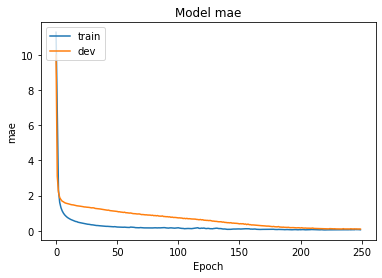

In [15]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel('Epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.title('Model mae')
plt.ylabel('mae')
plt.show()

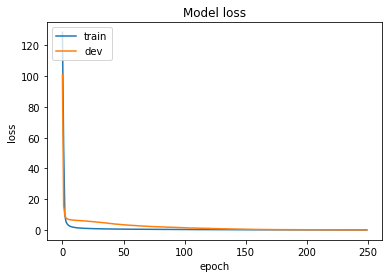

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

In [17]:
score = model.evaluate(x_train_scaled, y_train)
print("loss:", score[0])
print("metric (mae): ", score[1])

1458/1458 [==============================] - 0s 21us/step
loss: 0.02598966867631028
metric (mae):  0.0591522630186565


## Prediction (df_test)

In [18]:
y_preds = np.expm1(model.predict(x_test_scaled))   # exp(x)-1

submission = pd.read_csv("./input/raw/sample_submission.csv", index_col='Id')
submission['SalePrice'] = y_preds.astype(float)
submission.to_csv('./output/submission_Houseprice_NN.csv')